In [1]:
import time
import pandas as pd
import os

def ler_arquivo(file):
    out = []
    arquivo = open(file, 'r')
    for linha in arquivo:
        if len(linha)>1:
            for i in linha.split():
                out.append(int(i))
    arquivo.close()
    return out
def check_primes(p_true,p_test):
    for i in range(min([len(p_true),len(p_test)])):
        if p_test[i]!=p_true[i]:
            return False, f'Position {i}, value error = {p_test[i]}'
    return True, f'Max prime {p_test[i]}'

In [2]:
# os.listdir()
primes_true = ler_arquivo('datas/primes2to1299827.csv')
# pd.DataFrame(primes_true).to_csv('primes_true.csv',header=None,index=None)

In [155]:
class Primes:
    def is_prime(self,n):
        if n<2 or (n>2 and n%2==0) or (n>5 and n%5==0): return False
        if n==2: return True
        for i in range(3,int(n**(1/2))+1,2):
            if n%i==0: return False
        return True
    def next_prime(self,n):
        n+=1
        while True:
            if (n>2 and int(str(n)[-1])%2==0) or (n>5 and int(str(n)[-1])%5==0):
                pass
            else:
                if self.is_prime(n):
                    return n
            n+=1
    def prime_list(self,n_initial,n_final=None):
        if n_final is None:
            n_final = n_initial
            n_initial = 2
        primes = []
        for i in range(n_initial,n_final+1):
            if self.is_prime(i):
                primes.append(i)
        return primes
    def prime_gen(self,p=0,p_max=1000000,step=100000,save=False):
        primes_list = []
        for i in range(p,p_max,step):
            primes = self.prime_list(i,i+step)
            if save:
                data = pd.DataFrame(primes,columns=['primes'])
                data.to_csv(f'prime_datas/primes_{i}_to_{i+step}.csv')
            primes_list = primes_list+primes
        return primes_list
    def find_doubles(self,primes):
        doubles = []
        for i in range(len(primes)-1):
            if primes[i+1]-primes[i]==2:
                #               p1       ,p2         ,distância do par anterior
                if len(doubles)==0: d=(0,0,0)
                else: d = doubles[-1]
                doubles.append((primes[i],primes[i+1],primes[i]-d[1]))
        return doubles        

In [4]:
P,P_add = 0,2000000
ini = time.time()
P1 = Primes().prime_list(P,P+P_add)
print(time.time()-ini,'seconds')
P1[-1]

6.26455283164978 seconds


1999993

In [5]:
check_primes(primes_true,P1)

(True, 'Max prime 1299827')

In [6]:
#P,P_add = 15000000,10000000
ini = time.time()
P2 = Primes().prime_gen(P,P+P_add,1000000)
print(time.time()-ini,'seconds')

6.41251802444458 seconds


In [7]:
check_primes(primes_true,P2)

(True, 'Max prime 1299827')

In [8]:
#conferir se um número é primo
Primes().is_prime(39339889)

True

In [9]:
#Encontrar o próximo primo
Primes().next_prime(39339889)

39339929

<AxesSubplot:>

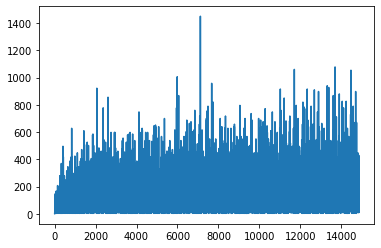

In [159]:
doubles = Primes().find_doubles(P1)
doubles = pd.DataFrame(doubles,columns=['p1','p2','distance'])
doubles['distance'].plot()

In [163]:
doubles.head(50)

,p1,p2,distance
0,3,5,3
1,5,7,0
2,11,13,4
3,17,19,4
4,29,31,10
5,41,43,10
6,59,61,16
7,71,73,10
8,101,103,28
9,107,109,4


In [164]:
doubles.tail(50)

,p1,p2,distance
14821,1992761,1992763,322
14822,1992839,1992841,76
14823,1992917,1992919,76
14824,1993037,1993039,118
14825,1993217,1993219,178
14826,1993259,1993261,40
14827,1993529,1993531,268
14828,1993601,1993603,70
14829,1993631,1993633,28
14830,1993679,1993681,46
